# Visualization Project: K. Esterhuysen

In [1]:
from fastai import *
from fastai.tabular import *
import seaborn as sns
import os

In [2]:
PATH='./'

In [3]:
df = pd.read_csv(f'{PATH}VisualizationProject.csv', low_memory=False)
df.shape, df.size

((60, 38), 2280)

In [4]:
df.head()

,Descriptor,Title,TE,acq,pacq,par,sen,typ,ptyp,etc,...,ITS,Translator,MultiBLEU,CT+VT,BLEU,secPerSen,percTopEdits,todxx,todver,Notes
0,1962-0704,WeWouldSeeJesus,NaN,1,1,1,1,1,1,NaN,...,NaN,MT,NaN,101964.0,NaN,65.194373,NaN,NaN,NaN,No todxo avail
1,1962-0705,JehovahJireh1 [linoli],linoli,1,1,1,1,1,1,NaN,...,NaN,MT,NaN,46403.0,NaN,31.481004,NaN,NaN,NaN,No todxo avail
2,1962-0706,JehovahJireh2 [tilvan],tilvan,1,1,1,1,1,1,NaN,...,NaN,MT,NaN,80812.0,NaN,52.373299,NaN,NaN,NaN,No todxo avail
3,1962-0707,JehovahJireh3 [linoli],linoli,1,1,1,1,1,1,NaN,...,NaN,MT,NaN,130580.0,NaN,87.520107,NaN,NaN,NaN,No todxo avail
4,1962-0708,ASuperSign [tilvan],tilvan,1,1,1,1,1,1,NaN,...,NaN,MT,NaN,130443.0,NaN,78.344144,NaN,NaN,NaN,No todxo avail


In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Descriptor,60,47,1965-0822x,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,60,59,WhatHouseWillYouBuildMe,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TE,52,16,tilvan,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acq,60,NaN,NaN,NaN,1,0,1,1,1,1,1
pacq,60,NaN,NaN,NaN,1,0,1,1,1,1,1
par,60,NaN,NaN,NaN,1,0,1,1,1,1,1
sen,60,NaN,NaN,NaN,1,0,1,1,1,1,1
typ,60,NaN,NaN,NaN,1,0,1,1,1,1,1
ptyp,60,NaN,NaN,NaN,1,0,1,1,1,1,1
etc,31,NaN,NaN,NaN,1,0,1,1,1,1,1


In [7]:
df = df[df.BLEU>=0]
df.shape, df.size

((48, 38), 1824)

## Subset the columns/features

In [8]:
print(list(df.columns))
#print(df.columns.tolist())

['Descriptor', 'Title', 'TE', 'acq', 'pacq', 'par', 'sen', 'typ', 'ptyp', 'etc', 'b', 'd', 'x', 'val', 'pval', 'sel', 'in', 'sep', 'edadd', 'ttt', 'EntryDate', 'UpdateDate', 'Language', 'EngSource', 'Source', 'TotBlks', 'TotPars', 'TotSent', 'ITS', 'Translator', 'MultiBLEU', 'CT+VT', 'BLEU', 'secPerSen', 'percTopEdits', 'todxx', 'todver', 'Notes']


In [9]:
df.Title.describe()

count                                   48
unique                                  48
top       WhatHouseWillYouBuildMe [davmwa]
freq                                     1
Name: Title, dtype: object

In [10]:
cats = ['Descriptor','TE','Language','TotSent','ITS','Translator','todxx','todver']
conts = ['BLEU','secPerSen','percTopEdits']
df2 = df[cats + conts]

In [11]:
df2 = df2.sort_values('BLEU')

In [12]:
df2.head()

,Descriptor,TE,Language,TotSent,ITS,Translator,todxx,todver,BLEU,secPerSen,percTopEdits
59,1965-1205,mosart,TWI,2139,0.0,NT,todno,1.0.0,0.0,146.054699,0.0
57,1965-1121,davmwa,BEM,233,0.0,NT,todno,1.0.0,0.0,154.699571,0.0
56,1965-0822x,davmwa,BEM,1705,0.0,NT,todno,1.0.0,0.0,82.566569,0.0
55,1965-0801z,mosart,TWI,1197,0.0,NT,todno,1.0.0,0.0,99.330827,0.0
54,1965-0426,davmwa,BEM,1852,0.0,NT,todno,1.0.0,0.0,91.863931,0.0


In [13]:
categorify = Categorify(cats, conts)
categorify(df2)

In [14]:
display_all(df2.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Descriptor,48,38,1965-0822x,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TE,48,16,tilvan,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,48,7,AFR,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotSent,48,38,2139,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITS,48,2,0,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Translator,48,3,MT,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
todxx,48,5,todmo,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
todver,39,4,2.0.0,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLEU,48,NaN,NaN,NaN,63.9956,34.344,0,45.885,81.52,88.115,99.66
secPerSen,48,NaN,NaN,NaN,61.6325,44.6857,4.94008,30.9669,41.9331,84.4777,176.992


### Inspect categoricals

In [15]:
print(df2.TE.cat.categories)
TE_colors = {'daisli':'k', 'davmwa':'k', 'dawnxu':'r', 'eliwal':'k', 'elsvan':'k', 'engest':'k', 'estzhe':'k',
       'jonsch':'k', 'julmuk':'k', 'lazbet':'k', 'linoli':'k', 'mosart':'k', 'pitrai':'k', 'ratdui':'k',
       'tilvan':'k', 'tobwul':'k'}
#df2.isnull().any()

Index(['daisli', 'davmwa', 'dawnxu', 'eliwal', 'elsvan', 'engest', 'estzhe',
       'jonsch', 'julmuk', 'lazbet', 'linoli', 'mosart', 'pitrai', 'ratdui',
       'tilvan', 'tobwul'],
      dtype='object')


In [16]:
print(df2.Language.cat.categories)
Language_colors = {'AFR':'red', 'BEM':'blue', 'CHN':'green', 'FIJ':'black', 
                   'GER':'orange', 'LUG':'yellow', 'TWI':'purple', 'IBO':'black', 'KIN':'salmon'}

Index(['AFR', 'BEM', 'CHN', 'FIJ', 'GER', 'LUG', 'TWI'], dtype='object')


In [17]:
print(df2.ITS.cat.categories)
ITS_colors = {0:'k', 1:'r'}

Float64Index([0.0, 1.0], dtype='float64')


In [18]:
print(df2.Translator.cat.categories)
Translator_colors = {'MT':'b', 'NT':'k', 'HT':'r'}

Index(['HT', 'MT', 'NT'], dtype='object')


In [19]:
print(df2.todxx.cat.categories)
todxx_colors = {'chnunp':'cyan', 'todbo':'b', 'todgo':'g', 'todmo':'magenta', 'todno':'k'}

Index(['chnunp', 'todbo', 'todgo', 'todmo', 'todno'], dtype='object')


## Iteration 1

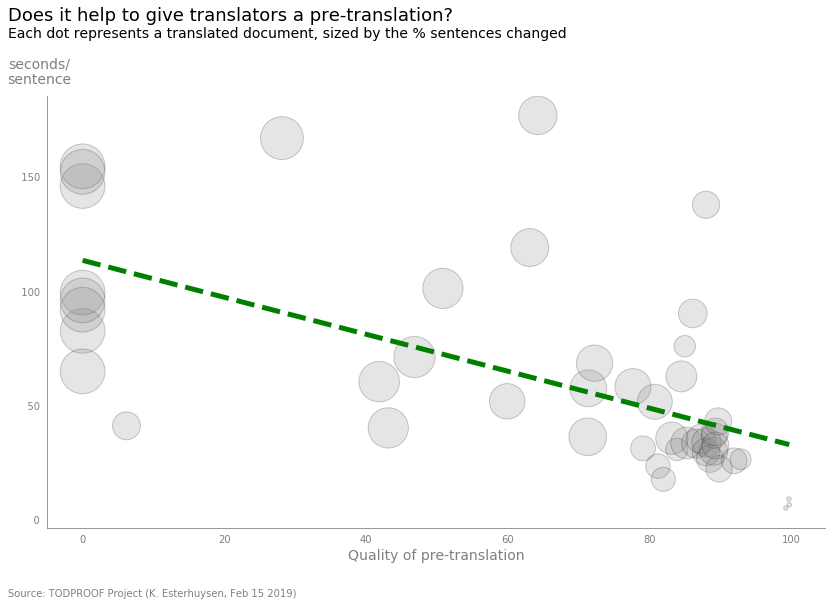

In [20]:
plt.figure(figsize=(12,8))
fig = plt.gcf()
#fig.set_facecolor('lightgreen') #just to understand what's going on

#matplotlib.markers: https://matplotlib.org/api/markers_api.html
pc = plt.scatter(x='BLEU', y='secPerSen', data=df2, 
                 s=20*(100-df2.percTopEdits), label='secPerSen', 
                 #marker='o',
                 #marker='s',
                 ##marker=r"$ {} $".format(df2.TE),
                 #marker='D',
                 #c=df2['TE'].apply(lambda x: TE_colors[x]))
                 #c=df2['Language'].apply(lambda x: Language_colors[x]))
                 #c=df2['ITS'].apply(lambda x: ITS_colors[x]))
                 #c=df2['Translator'].apply(lambda x: Translator_colors[x]))
                 #c=df2['todxx'].apply(lambda x: todxx_colors[x]))
                 c='grey')

ax = plt.gca()
#ax.set_yscale('log')

#trendline
z = np.polyfit(df2.BLEU, df2.secPerSen, 1)
p = np.poly1d(z)
#plt.plot(df2.BLEU, p(df2.BLEU), 'k-.', linewidth=5)
#plt.plot(df2.BLEU, p(df2.BLEU), 'k:', linewidth=5)
plt.plot(df2.BLEU, p(df2.BLEU), 'g--', linewidth=5)
#plt.xlabel('BLEU score', fontsize=15)
#plt.xlabel('Closeness of translation to pre-translation', fontsize=15)
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('seconds/\nsentence', fontsize=14, rotation=0, color='grey')
#ax.yaxis.set_label_coords(-0.17, .5)
ax.yaxis.set_label_coords(-0.01, 1.02)
#plt.suptitle(f'Does it help to give translators a pre-translation?', x=0, y=1.0, fontsize=15, fontweight='bold')
#plt.title(f'Pre-translation by means of MT', loc='left', fontsize=10, fontweight='bold')
#plt.legend()

#ax([.1,.1,.8,.8])
plt.figtext(-0.04,1,'Does it help to give translators a pre-translation?', fontsize=18, ha='left')
#plt.figtext(-0.04,.97,'Pre-translations provided by neural algorithms and humans', fontsize=14, ha='left')
plt.figtext(-0.04,.97,'Each dot represents a translated document, sized by the % sentences changed',
    fontsize=14, ha='left')
plt.figtext(-0.04,0,'Source: TODPROOF Project (K. Esterhuysen, Feb 15 2019)', fontsize=10, ha='left', color='grey')
pc.set_alpha(.2)
#pc.set_color('r')
pc.set_edgecolor('k')
#pc.set_edgecolor(None)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
#ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
#ax.yaxis.set_major_locator(plt.LogLocator(2))
#ax.yaxis.set_major_formatter(plt.LogFormatter())
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f'))
ax.tick_params(axis='y', colors='grey')

ax.set_position((0.005, 0.12, 0.9, 0.75))

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# removing the tick marks
ax.tick_params(bottom=False, left=False)

#plt.savefig(os.path.join('test.png'), dpi=600, format='png', bbox_inches='tight')

## Iteration 2

/home/proj/anaconda3/envs/fastai/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


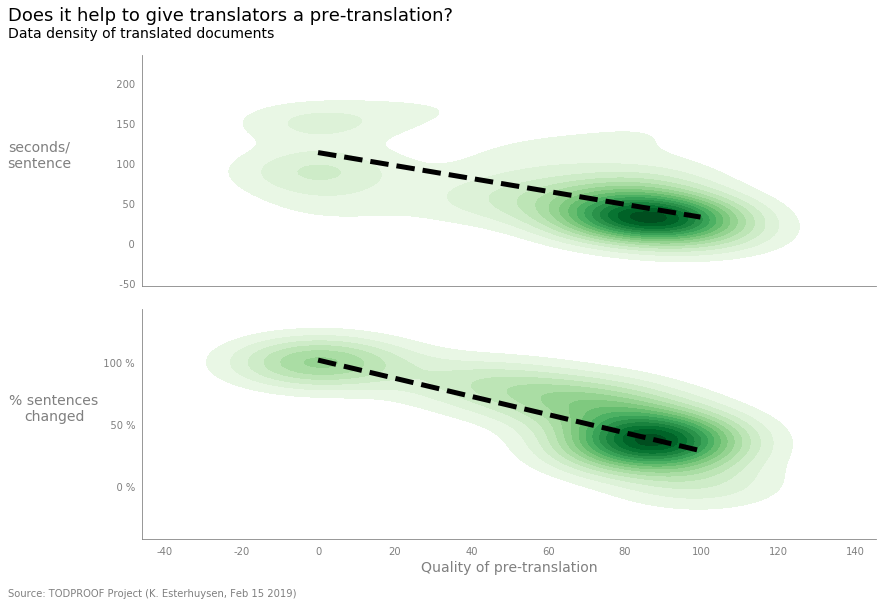

In [22]:
plt.figure(figsize=(12,8))
fig = plt.gcf()
#fig.set_facecolor('lightgreen') #just to understand what's going on
plt.figtext(-0.205,1,'Does it help to give translators a pre-translation?', fontsize=18, ha='left')
plt.figtext(-0.205,.97,'Data density of translated documents', fontsize=14, ha='left')
plt.figtext(-0.205,0,'Source: TODPROOF Project (K. Esterhuysen, Feb 15 2019)', fontsize=10, ha='left', color='grey')
SHADE_LOWEST = False
N_LEVELS = 15
SHADE=True

plt.subplot(211) #---------------------------------------------------------------------
ax = sns.kdeplot(df2.BLEU, df2.secPerSen, shade=SHADE, n_levels=N_LEVELS, 
    cmap='Greens', shade_lowest=SHADE_LOWEST)

pc.set_alpha(.2)
pc.set_edgecolor('k')
#plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
ax.get_xaxis().set_visible(False)
plt.ylabel('seconds/\nsentence', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.54, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.14, .5)

#trendline
z = np.polyfit(df2.BLEU, df2.secPerSen, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'k--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.subplot(212) #---------------------------------------------------------------------
ax = sns.kdeplot(df2.BLEU, 1*(100-df2.percTopEdits), shade=SHADE, n_levels=N_LEVELS, 
    cmap='Greens', shade_lowest=SHADE_LOWEST)

pc.set_alpha(.2)
pc.set_edgecolor('k')
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('% sentences\nchanged', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.10, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.12, .5)

#trendline
z = np.polyfit(df2.BLEU, 100-df2.percTopEdits, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'k--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f %%'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

#plt.savefig(os.path.join('test.png'), dpi=600, format='png', bbox_inches='tight')

## Iteration 3

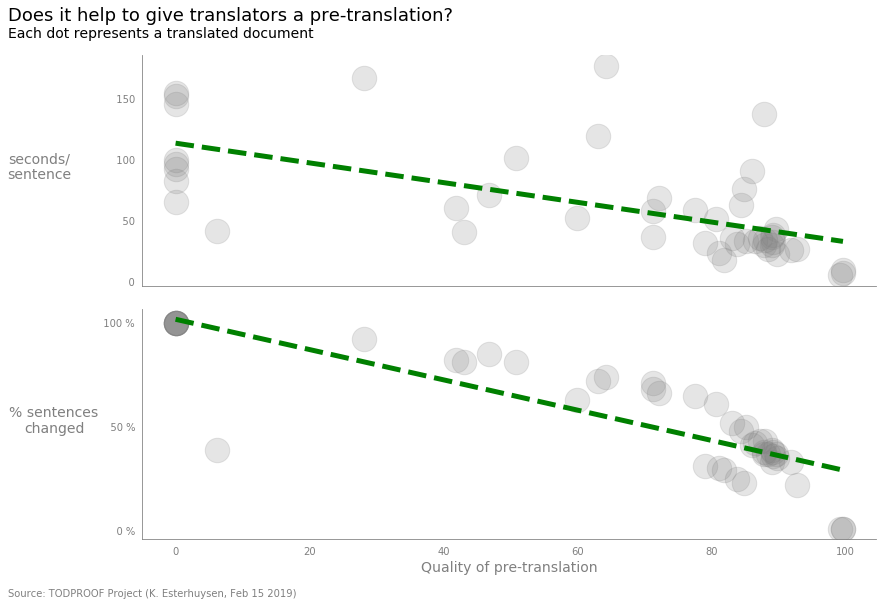

In [27]:
plt.figure(figsize=(12,8))
fig = plt.gcf()
#fig.set_facecolor('lightgreen') #just to understand what's going on
plt.figtext(-0.205,1,'Does it help to give translators a pre-translation?', fontsize=18, ha='left')
plt.figtext(-0.205,.97,'Each dot represents a translated document', 
    fontsize=14, ha='left')
plt.figtext(-0.205,0,'Source: TODPROOF Project (K. Esterhuysen, Feb 15 2019)', fontsize=10, ha='left', color='grey')
#MARKER_SIZE = 800
MARKER_SIZE = 600
ALPHA = .2

plt.subplot(211) #---------------------------------------------------------------------
pc = plt.scatter(x='BLEU', y='secPerSen', data=df2, s=MARKER_SIZE, label='secPerSen', c='grey')
pc.set_alpha(ALPHA)
plt.ylabel('seconds/\nsentence', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.54, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.14, .45)

#trendline
z = np.polyfit(df2.BLEU, df2.secPerSen, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'g--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.get_xaxis().set_visible(False)
ax.get_xaxis().set_ticklabels([])

plt.subplot(212) #---------------------------------------------------------------------
pc = plt.scatter(x='BLEU', y=1*(100-df2.percTopEdits), data=df2, s=MARKER_SIZE, label='secPerSen', 
                 #c=df2['TE'].apply(lambda x: TE_colors[x]))
                 #c=df2['Language'].apply(lambda x: Language_colors[x]))
                 #c=df2['ITS'].apply(lambda x: ITS_colors[x]))
                 #c=df2['Translator'].apply(lambda x: Translator_colors[x]))
                 #c=df2['todxx'].apply(lambda x: todxx_colors[x]))
                 c='grey')
pc.set_alpha(ALPHA)
#pc.set_edgecolor('k')
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('% sentences\nchanged', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.10, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.12, .45)

#trendline
z = np.polyfit(df2.BLEU, 100-df2.percTopEdits, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'g--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f %%'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

#plt.savefig(os.path.join('test.png'), dpi=600, format='png', bbox_inches='tight')

## Iteration 4

Text(65,20,'Human pre-translation')

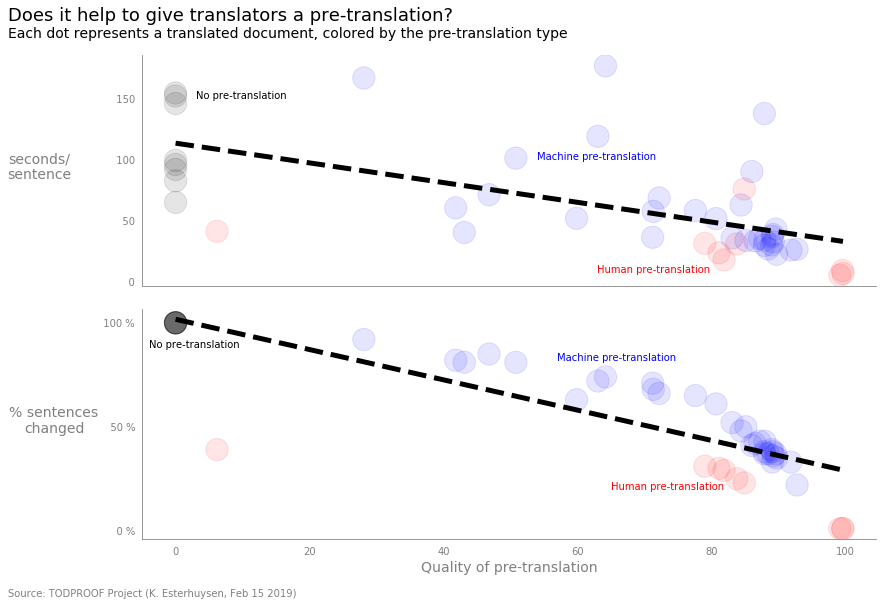

In [28]:
Translator_colors = {'MT':'b', 'NT':'k', 'HT':'r'}
plt.figure(figsize=(12,8))
fig = plt.gcf()
#fig.set_facecolor('lightgreen') #just to understand what's going on
plt.figtext(-0.205,1,'Does it help to give translators a pre-translation?', fontsize=18, ha='left')
plt.figtext(-0.205,.97,'Each dot represents a translated document, colored by the pre-translation type', 
    fontsize=14, ha='left')
plt.figtext(-0.205,0,'Source: TODPROOF Project (K. Esterhuysen, Feb 15 2019)', fontsize=10, ha='left', color='grey')
#MARKER_SIZE = 800
MARKER_SIZE = 500
#ALPHA = .2
ALPHA = .10

plt.subplot(211) #---------------------------------------------------------------------
pc = plt.scatter(x='BLEU', y='secPerSen', data=df2, s=MARKER_SIZE, label='secPerSen', 
                 c=df2['Translator'].apply(lambda x: Translator_colors[x]))
pc.set_alpha(ALPHA)
#pc.set_edgecolor('k')
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('seconds/\nsentence', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.54, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.14, .45)

#trendline
z = np.polyfit(df2.BLEU, df2.secPerSen, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'k--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.get_xaxis().set_visible(False)
ax.get_xaxis().set_ticklabels([])

plt.text(3, 150, 'No pre-translation', color='k')
plt.text(54, 100, 'Machine pre-translation', color='b')
plt.text(63, 7, 'Human pre-translation', color='r')

plt.subplot(212) #---------------------------------------------------------------------
pc = plt.scatter(x='BLEU', y=1*(100-df2.percTopEdits), data=df2, s=MARKER_SIZE, label='secPerSen', 
                 c=df2['Translator'].apply(lambda x: Translator_colors[x]))
pc.set_alpha(ALPHA)
#pc.set_edgecolor('k')
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('% sentences\nchanged', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.10, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.12, .45)

#trendline
z = np.polyfit(df2.BLEU, 100-df2.percTopEdits, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'k--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f %%'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.text(-4, 88, 'No pre-translation', color='k')
plt.text(57, 82, 'Machine pre-translation', color='b')
plt.text(65, 20, 'Human pre-translation', color='r')
#plt.savefig(os.path.join('test.png'), dpi=600, format='png', bbox_inches='tight')

## Iteration 5

Text(65,12,'Human pre-translation')

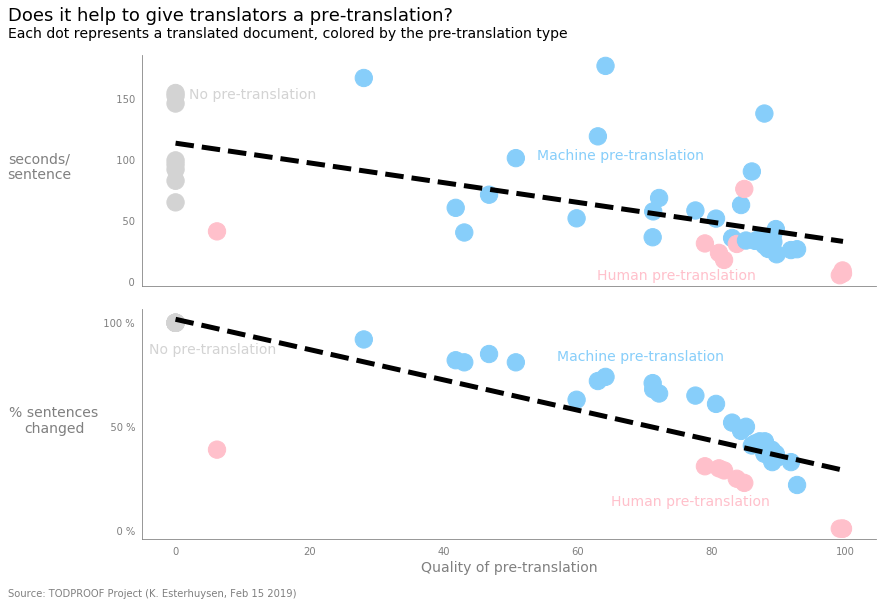

In [30]:
Translator_colors = {'MT':'lightskyblue', 'NT':'lightgrey', 'HT':'pink'}
#Translator_colors = {'MT':'lightskyblue', 'NT':'lightgrey', 'HT':'orange'}
plt.figure(figsize=(12,8))
fig = plt.gcf()
#fig.set_facecolor('lightgreen') #just to understand what's going on
plt.figtext(-0.205,1,'Does it help to give translators a pre-translation?', fontsize=18, ha='left')
plt.figtext(-0.205,.97,'Each dot represents a translated document, colored by the pre-translation type', 
    fontsize=14, ha='left')
plt.figtext(-0.205,0,'Source: TODPROOF Project (K. Esterhuysen, Feb 15 2019)', fontsize=10, ha='left', color='grey')
MARKER_SIZE = 300
#ALPHA = .10
ALPHA = 1

plt.subplot(211) #---------------------------------------------------------------------
pc = plt.scatter(x='BLEU', y='secPerSen', data=df2, s=MARKER_SIZE, label='secPerSen', 
                 c=df2['Translator'].apply(lambda x: Translator_colors[x]))
pc.set_alpha(ALPHA)
#pc.set_edgecolor('k')
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('seconds/\nsentence', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.54, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.14, .45)

#trendline
z = np.polyfit(df2.BLEU, df2.secPerSen, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'k--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.get_xaxis().set_visible(False)
ax.get_xaxis().set_ticklabels([])

plt.text(2, 150, 'No pre-translation', color='lightgrey', fontsize=14)
plt.text(54, 100, 'Machine pre-translation', color='lightskyblue', fontsize=14)
plt.text(63, 1, 'Human pre-translation', color='pink', fontsize=14)

plt.subplot(212) #---------------------------------------------------------------------
pc = plt.scatter(x='BLEU', y=1*(100-df2.percTopEdits), data=df2, s=MARKER_SIZE, label='secPerSen', 
                 c=df2['Translator'].apply(lambda x: Translator_colors[x]))
pc.set_alpha(ALPHA)
#pc.set_edgecolor('k')
plt.xlabel('Quality of pre-translation', fontsize=14, color='grey')
plt.ylabel('% sentences\nchanged', fontsize=14, rotation=0, color='grey')
ax = plt.gca()
ax.set_position((-0.05, 0.10, 0.85, 0.4))
ax.yaxis.set_label_coords(-0.12, .45)

#trendline
z = np.polyfit(df2.BLEU, 100-df2.percTopEdits, 1)
p = np.poly1d(z)
plt.plot(df2.BLEU, p(df2.BLEU), 'k--', linewidth=5)

#ticks
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
ax.tick_params(axis='x', colors='grey')
ax.yaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%5.0f %%'))
ax.tick_params(axis='y', colors='grey')
ax.tick_params(bottom=False, left=False)

#spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

plt.text(-4, 85, 'No pre-translation', color='lightgrey', fontsize=14)
plt.text(57, 82, 'Machine pre-translation', color='lightskyblue', fontsize=14)
plt.text(65, 12, 'Human pre-translation', color='pink', fontsize=14)
#plt.savefig(os.path.join('test.png'), dpi=600, format='png', bbox_inches='tight')